# Semester Project - Artificial Intelligence
## Automatic Number Plate Recognition
## Bahria University Islamabad 

### Group Members:   
**Saadat Hussain - 01-134211-078**  
**Shanze Malik - 01-134211-085**  
  
**Class-Section: BSCS 6-B**

In [ ]:
!pip install ultralytics easyocr

In [1]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import numpy as np
import easyocr

ModuleNotFoundError: No module named 'easyocr'

In [6]:
DATA_DIR = "data"
folders = ["train", "test"]

# 1. Moving Data Into Proper Directories

In [11]:
selected_files = [file for file in os.listdir(train_path) if file.endswith(".xml")]

selected_files

['Cars0.xml',
 'Cars1.xml',
 'Cars10.xml',
 'Cars100.xml',
 'Cars101.xml',
 'Cars102.xml',
 'Cars103.xml',
 'Cars104.xml',
 'Cars105.xml',
 'Cars106.xml',
 'Cars107.xml',
 'Cars108.xml',
 'Cars109.xml',
 'Cars11.xml',
 'Cars110.xml',
 'Cars111.xml',
 'Cars112.xml',
 'Cars113.xml',
 'Cars114.xml',
 'Cars115.xml',
 'Cars116.xml',
 'Cars117.xml',
 'Cars118.xml',
 'Cars119.xml',
 'Cars12.xml',
 'Cars120.xml',
 'Cars121.xml',
 'Cars122.xml',
 'Cars123.xml',
 'Cars124.xml',
 'Cars125.xml',
 'Cars126.xml',
 'Cars127.xml',
 'Cars128.xml',
 'Cars129.xml',
 'Cars13.xml',
 'Cars130.xml',
 'Cars131.xml',
 'Cars132.xml',
 'Cars133.xml',
 'Cars134.xml',
 'Cars135.xml',
 'Cars136.xml',
 'Cars137.xml',
 'Cars138.xml',
 'Cars139.xml',
 'Cars14.xml',
 'Cars140.xml',
 'Cars141.xml',
 'Cars142.xml',
 'Cars143.xml',
 'Cars144.xml',
 'Cars145.xml',
 'Cars146.xml',
 'Cars147.xml',
 'Cars148.xml',
 'Cars149.xml',
 'Cars15.xml',
 'Cars150.xml',
 'Cars151.xml',
 'Cars152.xml',
 'Cars153.xml',
 'Cars154.xml',
 '

In [15]:
try:
    os.makedirs(os.path.join("train_labels"))
except:
    print("Directory already created!")

### 1.1 Moving Labels From Images Folder 

In [18]:
for file in selected_files:
    current_path = os.path.join("train", file)
    new_path = os.path.join("train_labels", file)
        
    print(f"Moving file path from {current_path} to {new_path}")
    
    os.replace(current_path, new_path)

Moving file path from train\Cars0.xml to train_labels\Cars0.xml
Moving file path from train\Cars1.xml to train_labels\Cars1.xml
Moving file path from train\Cars10.xml to train_labels\Cars10.xml
Moving file path from train\Cars100.xml to train_labels\Cars100.xml
Moving file path from train\Cars101.xml to train_labels\Cars101.xml
Moving file path from train\Cars102.xml to train_labels\Cars102.xml
Moving file path from train\Cars103.xml to train_labels\Cars103.xml
Moving file path from train\Cars104.xml to train_labels\Cars104.xml
Moving file path from train\Cars105.xml to train_labels\Cars105.xml
Moving file path from train\Cars106.xml to train_labels\Cars106.xml
Moving file path from train\Cars107.xml to train_labels\Cars107.xml
Moving file path from train\Cars108.xml to train_labels\Cars108.xml
Moving file path from train\Cars109.xml to train_labels\Cars109.xml
Moving file path from train\Cars11.xml to train_labels\Cars11.xml
Moving file path from train\Cars110.xml to train_labels\Cars

Moving file path from train\Cars386.xml to train_labels\Cars386.xml
Moving file path from train\Cars387.xml to train_labels\Cars387.xml
Moving file path from train\Cars388.xml to train_labels\Cars388.xml
Moving file path from train\Cars389.xml to train_labels\Cars389.xml
Moving file path from train\Cars39.xml to train_labels\Cars39.xml
Moving file path from train\Cars390.xml to train_labels\Cars390.xml
Moving file path from train\Cars391.xml to train_labels\Cars391.xml
Moving file path from train\Cars392.xml to train_labels\Cars392.xml
Moving file path from train\Cars393.xml to train_labels\Cars393.xml
Moving file path from train\Cars394.xml to train_labels\Cars394.xml
Moving file path from train\Cars395.xml to train_labels\Cars395.xml
Moving file path from train\Cars396.xml to train_labels\Cars396.xml
Moving file path from train\Cars397.xml to train_labels\Cars397.xml
Moving file path from train\Cars398.xml to train_labels\Cars398.xml
Moving file path from train\Cars399.xml to train_l

# 2. Data Preprocessing 

### 2.1 Getting an Image and Drawing Bounding Box

In [9]:
random_image = os.path.join(DATA_DIR, folders[0], "images", "Cars0.png")
image = cv2.imread(random_image)

In [10]:
image.shape

(531, 600, 3)

In [11]:
random_label = os.path.join(DATA_DIR, folders[0], "labels", "Cars0.xml")

def parseXML(xmlfile): 
  
    # create element tree object 
    tree = ET.parse(xmlfile) 
  
    # get root element 
    root = tree.getroot() 
    
    coordinates = []
    count = 0
    
    for obj in root.findall("./object"):
        count += 1
        
        # Breaks if Image has 2 bounding boxes
        if  count >1:  break
    
        # Getting Bounding Boxes and storing in array
        for item in root.findall('./object/bndbox'): 

            # Iterating through bounding boxes
            for coord in item:
                # print(coord.text)
                coordinates.append(int(coord.text))
        
    return coordinates 

coordinates = parseXML(random_label)

coordinates

[226, 125, 419, 173]

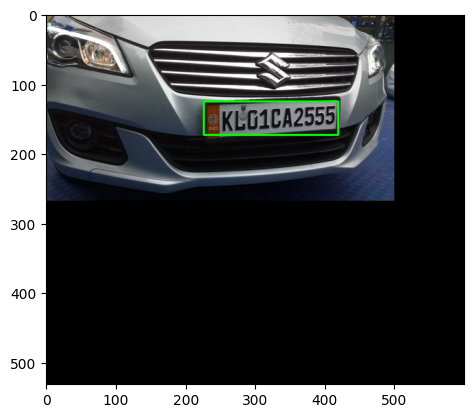

In [12]:
# Drawing on Image
cv2.rectangle(image, coordinates[:2], coordinates[2:], (0, 255, 0), 2)

plt.imshow(image)

### 2.2 Extracting Highlighted Region/Numberplate

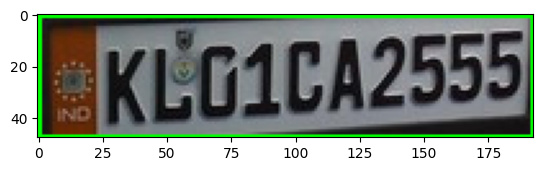

In [13]:
# Extract the bounded region
bounded_region = image[coordinates[1]:coordinates[3], coordinates[0]:coordinates[2]]

licence_plate = plt.imshow(bounded_region)

###  2.3 Apply Blur for EasyOCR

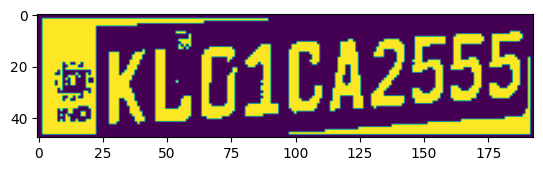

In [14]:
plate_grayscale = cv2.cvtColor(bounded_region, cv2.COLOR_BGR2GRAY)
_ , plate_threshold = cv2.threshold(plate_grayscale, 64, 256, cv2.THRESH_BINARY_INV)

plt.imshow(plate_threshold)

### 2.4 Applying EasyOCR

In [15]:
reader = easyocr.Reader(["en"], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [16]:
# Use the easyocr reader to detect text from the image
result = reader.readtext(plate_threshold)

# Print the detected text
for detection in result:
    print(detection[1])

KLO1CA2555


### 2.5 Padding Images 

Since our images are not of the same resolution.

1. Get maximum size image 
2. Pad image top and right to prevent bounding box from displacing. 

In [17]:
max_X = 0
max_Y = 0

# Getting Max Image Size
for image in os.listdir(os.path.join(DATA_DIR, folders[0], "images")):
    img = cv2.imread(os.path.join(DATA_DIR, folders[0], "images", image)).shape
    if max_X < img[0]:
        max_X = img[0]
        
    if img[1] > max_Y:
        max_Y = img[1]
        
max_image_size = (max_X, max_Y, 3)
max_image_size

(531, 600, 3)

#### 2.5.2 Applying Padding to Image 

The `cv2.copyMakeBorder` function in OpenCV is utilized to add borders to an image, commonly employed for tasks such as image padding. Here's an breakdown of its parameters:

- **`src`**: This is the source image to which borders will be added.

- **`top`**: The number of pixels to add as a border at the top of the image.

- **`bottom`**: The number of pixels to add as a border at the bottom of the image.

- **`left`**: The number of pixels to add as a border on the left side of the image.

- **`right`**: The number of pixels to add as a border on the right side of the image.

- **`borderType`**: This parameter specifies the type of border to add. In this case, `cv2.BORDER_CONSTANT` indicates that a constant border should be added. Other possible values include `cv2.BORDER_REPLICATE`, `cv2.BORDER_REFLECT`, `cv2.BORDER_WRAP`, etc.

- **`value`**: This parameter specifies the color of the border. If `borderType` is set to `cv2.BORDER_CONSTANT`, then `value` is the color of the border, given as a list or tuple of RGB values. In this example, `[0, 0, 0]` represents black.



In [18]:
def pad_image(image, target_size=(531, 600, 3)):
    # Calculate the amount of padding needed for each dimension
    pad_height = np.maximum(0, int(target_size[0]) - int(image.shape[0]))
    pad_width = np.maximum(0, int(target_size[1]) - int(image.shape[1]))

    # print(pad_height, pad_width)
    # Pad the image only from the bottom and right sides
    padded_image = cv2.copyMakeBorder(image, 0, pad_height, 0, pad_width, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return padded_image

In [19]:
# Example usage:
image_path = os.path.join(DATA_DIR, folders[0], "images", "Cars0.png")  # Replace with the actual path to your image
original_image = cv2.imread(image_path)
original_image.shape

(531, 600, 3)

### 2.6 Plot Results

In [20]:
# Pad the image from the bottom and right sides only
padded_image = pad_image(original_image, max_image_size)

padded_image

array([[[100,  75,  25],
        [159, 130,  73],
        [158, 127,  52],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[101,  79,  31],
        [146, 121,  65],
        [151, 119,  46],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[104,  87,  44],
        [139, 117,  65],
        [146, 116,  43],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

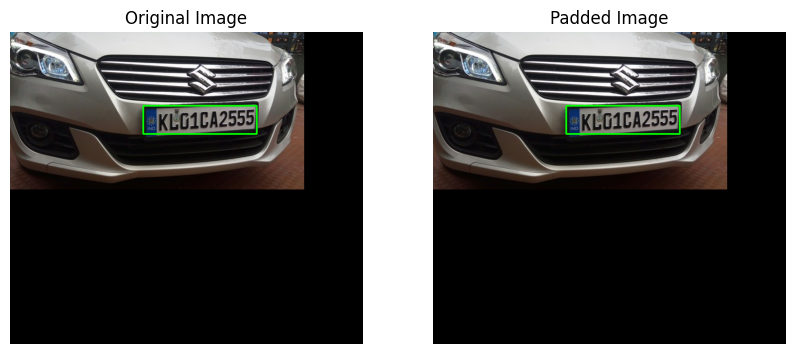

In [21]:
# Pad the image from the bottom and right sides only
padded_image = pad_image(original_image, max_image_size)

# Display the original and padded images
# Convert BGR to RGB (matplotlib uses RGB)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
padded_image_rgb = cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB)

cv2.rectangle(original_image_rgb, coordinates[:2], coordinates[2:], (0, 255, 0), 2)
cv2.rectangle(padded_image_rgb, coordinates[:2], coordinates[2:], (0, 255, 0), 2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(original_image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the padded image
axes[1].imshow(padded_image_rgb)
axes[1].set_title('Padded Image')
axes[1].axis('off')

# Show the subplots
plt.show()

# 3. Tensorflow Pipeline

### 3.1 Filtering Data

Removing images with more than one bounding box annotation.

In [1]:
def check_and_remove_data(image_name, folder_name) -> bool:
    label_file = os.path.join("data", folder_name, "labels", f"{image_name}.xml")
    
    # create element tree object 
    tree = ET.parse(label_file) 

    # get root element 
    root = tree.getroot() 
            
    if len(root.findall("./object")) > 1:       
        image_path = os.path.join("data", folder_name, "images", f"{image_name}.png")
        label_path = os.path.join("data", folder_name, "labels", f"{image_name}.xml")
        
        # Check if the file exists before attempting to delete
        if os.path.exists(image_path) and os.path.exists(label_path):
            os.remove(image_path)
            os.remove(label_path)
            print(f"Removing Image {image_name}.png and label {image_name}.xml")
        else:
            print(f"The file '{file_path}' does not exist.")
            
        # Return true for each image and label removed  
        return True
    
    # Base Condition
    return False
    

In [4]:
all_images = os.listdir(os.path.join("data", "test", "images"))

count = 0
try:
    for images in all_images:
        file_name = images.split(".")[0]
        res = check_and_remove_data(file_name, "test")

        if res: 
            count += 1
except: 
    print("No Images to remove")
        
print(f"Images and labels removed {count}")

Removing Image Cars413.png and label Cars413.xml
Images and labels removed 1


### 3.2 Gathering Labels

Parsing XML file and returning an array containing the bounding box coordinates

In [15]:
# Extract bounding box from the label 
def get_labels(path):
    coordinates = []
    
    for label_file in os.listdir(path):
        bounding_box = parseXML(os.path.join(path , label_file))
        # print(f"File Name: {label_file},  {bounding_box}")
        
        coordinates.append(bounding_box)
    
    return coordinates

In [23]:
# Path of all the labels 
labels_path = os.path.join(DATA_DIR, folders[0], "labels")

# Getting all bounding boxes
target_labels = get_labels(labels_path)

# Converting to numpy
target_labels = np.array(target_labels)

target_labels

array([[226, 125, 419, 173],
       [134, 128, 262, 160],
       [140,   5, 303, 148],
       ...,
       [ 98, 102, 297, 191],
       [ 85, 196, 247, 259],
       [ 70, 198, 262, 271]])

In [24]:
target_labels.shape

(388, 4)

### 3.3 Gathering Images 

In [158]:
# Reads directly in RGB
def load_image(path):
    byte_image = tf.io.read_file(path)
    image = tf.io.decode_png(byte_image)
    # image  = pad_image(image, max_image_size)
    return image

### 3.4 Testing Tensorflow Datasets API

In [64]:
all_images = tf.data.Dataset.list_files(os.path.join(DATA_DIR, folders[0], "images", "*.png"))

all_images.as_numpy_iterator().next()

b'data\\train\\images\\Cars237.png'

In [65]:
all_images = all_images.map(load_image)

In [76]:
all_images.as_numpy_iterator().next()

array([[[ 52,  57,  40, 223],
        [ 53,  58,  41, 223],
        [ 54,  60,  42, 223],
        ...,
        [160, 161, 160, 223],
        [160, 161, 159, 223],
        [157, 158, 156, 223]],

       [[ 41,  46,  29, 255],
        [ 44,  49,  32, 255],
        [ 45,  50,  33, 255],
        ...,
        [160, 162, 160, 255],
        [160, 162, 160, 255],
        [157, 158, 157, 255]],

       [[ 40,  45,  28, 255],
        [ 45,  51,  33, 255],
        [ 51,  56,  39, 255],
        ...,
        [159, 161, 159, 255],
        [159, 161, 159, 255],
        [157, 158, 156, 255]],

       ...,

       [[ 92,  91,  92, 255],
        [ 93,  91,  93, 255],
        [ 92,  90,  92, 255],
        ...,
        [ 89,  87,  89, 255],
        [ 89,  87,  88, 255],
        [ 89,  87,  89, 255]],

       [[ 92,  90,  92, 255],
        [ 92,  90,  92, 255],
        [ 92,  90,  92, 255],
        ...,
        [ 89,  88,  89, 255],
        [ 89,  87,  88, 255],
        [ 89,  88,  89, 255]],

       [[ 92

### 3.5 Adding Images to Pipeline

In [159]:
images = {}

# images[f"{folders[0]}_images"] = tf.data.Dataset.list_files(os.path.join(DATA_DIR, folders[0], "images", "*.png"), shuffle=False)
# images[f"{folders[0]}_images"] =  images[f"{folders[0]}_images"].map(load_image)

# images[f"{folders[1]}_images"] = tf.data.Dataset.list_files(os.path.join(DATA_DIR, folders[1], "images", "*.png"), shuffle=False)
# images[f"{folders[1]}_images"] =  images[f"{folders[1]}_images"].map(load_image)
for folder in folders:
    images_path  = os.path.join(DATA_DIR, "train_padded", "images", "*.png")
    
    images[f"{folder}_images"] = tf.data.Dataset.list_files(images_path, shuffle=False)
    
    images[f"{folder}_images"] =  images[f"{folder}_images"].map(load_image)

    #     # Apply the pad_image using tf.py_function
    # images[f"{folder}_images"] = images[f"{folder}_images"].map(
    #     lambda x: tf.py_function(pad_image, [x, max_image_size], Tout=tf.uint8)
    # )
    
    # images[f"{folder}_images"] =  images[f"{folder}_images"].map(lambda x: x /255)
    
images

{'train_images': <_MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>,
 'test_images': <_MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>}

In [162]:
images["train_images"].as_numpy_iterator().next()

array([[[ 25,  75, 100],
        [ 73, 130, 159],
        [ 52, 127, 158],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 31,  79, 101],
        [ 65, 121, 146],
        [ 46, 119, 151],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 44,  87, 104],
        [ 65, 117, 139],
        [ 43, 116, 146],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

### 3.6 Adding Labels to Pipeline

In [23]:
def parse_dataset(xml_path_tensor):
    # Use tf.py_function to wrap the parsing function
    def parse_func(xml_path):
        xml_path = xml_path.numpy().decode('utf-8')
        
        bbox_coords = parseXML(xml_path)
        
        return bbox_coords

    bbox_coords = tf.py_function(parse_func, [xml_path_tensor], [tf.int32, tf.int32, tf.int32, tf.int32])
    
    # Stack the individual tensors along the last axis to get a single tensor
    bbox_coords = tf.stack(bbox_coords, axis=-1)
    
    return bbox_coords


In [24]:
labels = {}

for folder in folders:
    labels_path  = os.path.join(DATA_DIR, folder, "labels", "*.xml")
    
    labels[f"{folder}_labels"] = tf.data.Dataset.list_files(labels_path, shuffle=False)
    
    labels[f"{folder}_labels"] = labels[f"{folder}_labels"].map(parse_dataset)
    
    labels[f"{folder}_labels"] = labels[f"{folder}_labels"].map(lambda x: x / 255)
    
    
labels["train_labels"].as_numpy_iterator().next()

array([0.88627451, 0.49019608, 1.64313725, 0.67843137])

In [146]:
labels["train_labels"].as_numpy_iterator().next()

array([0.88627451, 0.49019608, 1.64313725, 0.67843137])

### 3.7 Combining Images and Labels

In [179]:
training_set = tf.data.Dataset.zip(images["train_images"], labels["train_labels"])

# training_set = training_set.batch(8)  # Adjust batch_size as needed
# # training_set = training_set.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# training_set = training_set.prefetch(4)


In [180]:
training_set.as_numpy_iterator().next()

(array([[[ 25,  75, 100],
         [ 73, 130, 159],
         [ 52, 127, 158],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 31,  79, 101],
         [ 65, 121, 146],
         [ 46, 119, 151],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 44,  87, 104],
         [ 65, 117, 139],
         [ 43, 116, 146],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [181]:
training_set = training_set.batch(batch_size=8)  # Adjust batch_size as needed
# training_set = training_set.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
training_set = training_set.prefetch(4)

In [182]:
training_set.as_numpy_iterator().next()[0].shape

(8, 531, 600, 3)

# Applying YOLO

In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [4]:
model.load("best.pt")

Transferred 319/355 items from pretrained weights


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [5]:
img = cv2.imread("/data/test/test_padded/Cars411.png")

img

NameError: name 'cv2' is not defined

In [ ]:
results = model.predict()

# Model Building

In [102]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, GlobalMaxPooling2D, Flatten
from tensorflow.keras.applications import VGG16

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

### Downloading the model

In [89]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 25s 0us/step


In [184]:
def build_model():
    input_layer = Input(shape=(531, 600, 3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    max_pooling = GlobalMaxPooling2D()(vgg)
    dense_1 = Dense(2048, activation="relu")(max_pooling)
    output_layer = Dense(4, activation="sigmoid")(dense_1)
    
    plate_detector = Model(inputs=input_layer, outputs=[output_layer], name="PlateNet")
    
    return plate_detector

In [185]:
build_model().summary()

Model: "PlateNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 531, 600, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_max_pooling2d_4 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_20 (Dense)            (None, 2048)              1050624   
                                                                 
 dense_21 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 15773508 (60.17 MB)
Trainable params: 15773508 (60.17 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [186]:
model = build_model()

In [187]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # You can adjust the learning rate (lr) as needed
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [188]:
image_path = os.path.join(DATA_DIR, folders[0], "images", "Cars0.png")  # Replace with the actual path to your image
original_image = cv2.imread(image_path)

image = pad_image(original_image, max_image_size)
image.shape

263 100


(531, 600, 3)

In [189]:
res = model.predict(tf.expand_dims(image, axis=0))

res

1/1 [==============================] - 1s 701ms/step


array([[1.0000000e+00, 1.0000000e+00, 1.9780703e-14, 1.0000000e+00]],
      dtype=float32)

In [191]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float64, name=None))>

In [190]:
# keras.utils.plot_model(model, "model.png",show_shapes=True)

# Assuming you have train_dataset and validation_dataset
epochs = 10
batch_size = 8

# Fit the model with labels
history = model.fit(
    training_set,
    epochs=epochs,
)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\compile_utils.py", line 652, in _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    ValueError: as_list() is not defined on an unknown TensorShape.


# 6. Training Model on Dataset

In [135]:
# Define the custom top
def custom_top(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  # Flatten the input
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model

# Build the VGG16 base model (excluding the top)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(531, 600, 3))

# Flatten the output of the VGG16 base model
flattened_output = Flatten()(vgg_base.output)

# Create the custom top
custom_top_model = custom_top(flattened_output.shape[1:], 4)  # Use the shape of the flattened output

# Combine the VGG16 base and custom top
model = Sequential([
    vgg_base,
    custom_top_model
])

# Compile the model
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

# Display the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 16, 18, 512)       14714688  
                                                                 
 sequential_7 (Sequential)   (None, 4)                 75630340  
                                                                 
Total params: 90345028 (344.64 MB)
Trainable params: 90345028 (344.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
os.makedirs(os.path.join(DATA_DIR, "test","test_padded", "images"))

In [23]:
for image in os.listdir(os.path.join(DATA_DIR, folders[1], "images")):
    img = cv2.imread(os.path.join(DATA_DIR, folders[1], "images", image))

    img = pad_image(img, max_image_size)

    # Assuming 'image_name' is the name you want to give to the saved image
    image_name = image

    # Specify the full path to save the image
    image_path = os.path.join(DATA_DIR, "test","test_padded", image_name)

    # Save the image using cv2.imwrite
    cv2.imwrite(image_path, img)


In [199]:
training_images = []

for image in os.listdir(os.path.join(DATA_DIR, folders[0], "images")):
    img = cv2.imread(os.path.join(DATA_DIR, folders[0], "images", image))

    img = pad_image(img, max_image_size)

    img = img / 255

    training_images.append(img)

training_images  = np.array(training_images)

training_images.shape

(388, 531, 600, 3)

In [201]:
training_labels = []

for label in os.listdir(os.path.join(DATA_DIR, folders[0], "labels")):
    lb = os.path.join(DATA_DIR, folders[0], "labels", label)

    parsed_label = parseXML(lb)

    # Normalize each element in the parsed_label list
    parsed_label = [value / 255.0 for value in parsed_label]

    training_labels.append(parsed_label)
    
training_labels = np.array(training_labels)

# Ensure that the shape of the array is as expected
training_labels.shape

(388, 4)

In [203]:
# Fit the model to dummy data
model.fit(training_images, training_labels, epochs=5)

MemoryError: Unable to allocate 1.38 GiB for an array with shape (388, 531, 600, 3) and data type float32